# Exploratory Data Analysis

In [1]:
# import Libraries

import pandas as pd
import numpy as np
import plotly.express as px
import missingno as msno

In [2]:
# Read the csv into df

df = pd.read_csv('data/house_sales.csv', delimiter=',')
df.describe()
#higher view the better


,price,house_id,id,id.1,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19206.000000,...,21597.000000,21597.000000,21145.000000,21597.000000,17749.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,4.580474e+09,10799.000000,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007602,...,7.657915,1788.596842,291.857224,1970.999676,836.650516,98077.951845,47.560093,-122.213983,1986.620318,12758.283512
std,3.673681e+05,2.876736e+09,6234.661218,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086858,...,1.173200,827.759761,442.490863,29.375234,4000.110554,53.513072,0.138552,0.140724,685.230472,27274.441950
min,7.800000e+04,1.000102e+06,1.000000,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,...,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,2.123049e+09,5400.000000,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.904930e+09,10799.000000,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,6.450000e+05,7.308900e+09,16198.000000,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,9.900000e+09,21597.000000,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,...,13.000000,9410.000000,4820.000000,2015.000000,20150.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [3]:
# Get an Overview

#df.info()
df["view"].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

In [4]:
# Start Cleaning and Rename df

housing = df.drop(columns='id.1')
housing.rename(columns={"id":"sales_id"}, inplace=True)
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   sales_id       21597 non-null  int64  
 4   bedrooms       21597 non-null  float64
 5   bathrooms      21597 non-null  float64
 6   sqft_living    21597 non-null  float64
 7   sqft_lot       21597 non-null  float64
 8   floors         21597 non-null  float64
 9   waterfront     19206 non-null  float64
 10  view           21534 non-null  float64
 11  condition      21597 non-null  int64  
 12  grade          21597 non-null  int64  
 13  sqft_above     21597 non-null  float64
 14  sqft_basement  21145 non-null  float64
 15  yr_built       21597 non-null  int64  
 16  yr_renovated   17749 non-null  float64
 17  zipcode        21597 non-null  int64  
 18  lat   

<Axes: >

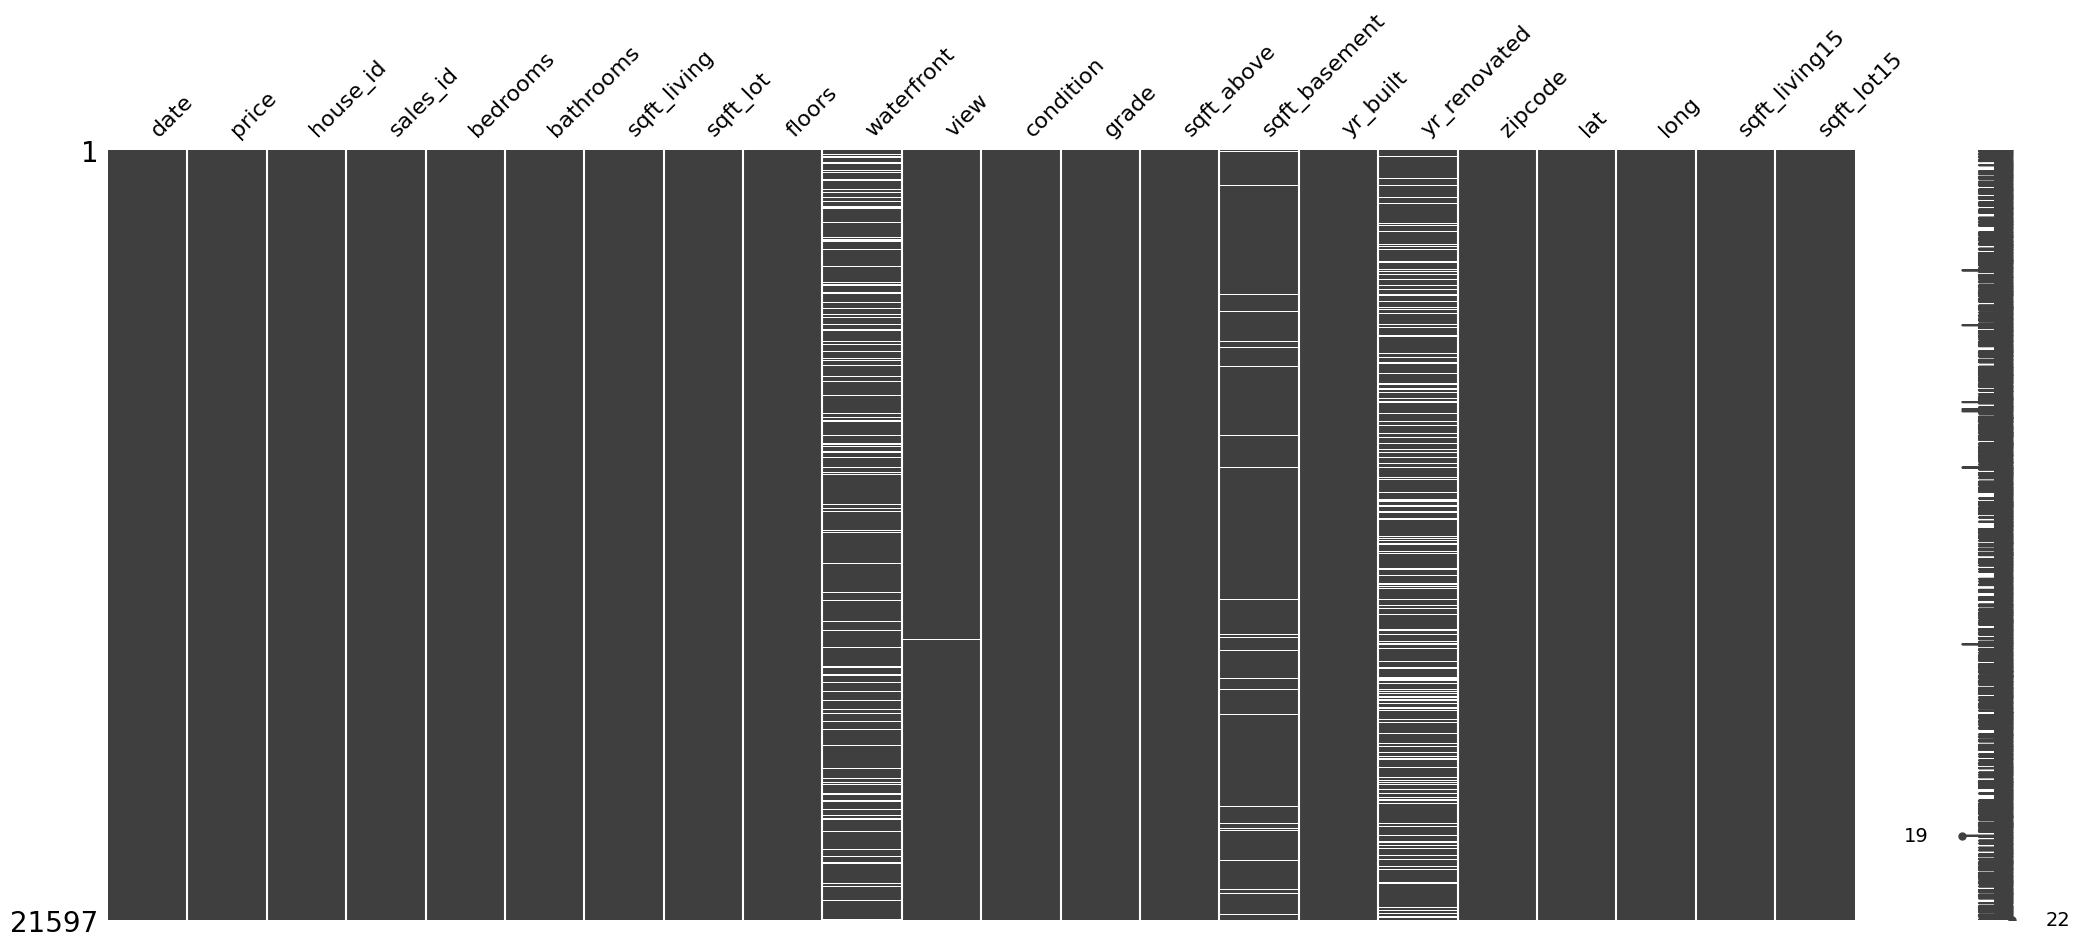

In [5]:
# Exploring Missing Data in Missingno
msno.matrix(housing)

In [6]:
# Plot interesting data
import plotly.graph_objects as go
from plotly.subplots import make_subplots

y = housing["price"]

fig = make_subplots(
    rows = 2, cols = 2, 
    subplot_titles=("View", "Quality", "Living Space", "Condition"))

fig.add_trace(go.Scatter(x=housing["view"], y=y),
              row=1, col=1)
fig.add_trace(go.Scatter(x=housing["grade"], y=y),
              row=1, col=2)
fig.add_trace(go.Scatter(x=housing["sqft_living"], y=y),
              row=2, col=1)
fig.add_trace(go.Scatter(x=housing["condition"], y=y),
              row=2, col=2)
fig.update_layout(height=600, width=800, title_text="Price Drivers")
fig.show()

In [7]:
df_geo = housing.head(100)
fig = px.scatter_mapbox(df_geo, lat="lat", lon="long",
                         hover_name="price",
                         mapbox_style="open-street-map")

fig.update_geos(fitbounds = "locations")

fig.show()

# Hypothesis 1 - Price Drivers

### Hypothesis: Not all factors have the same influence on the price!
and some factors might be interesting to my client that are beneficial in finding lower prices and/or selling higher

In [8]:
hypothesis1 = housing.copy()
price_corr = housing.copy()

#Exclude NaN Columns
price_corr_row = price_corr.dropna(axis=0,how='any')
price_corr_col = price_corr.dropna(axis=1, how='any')

# Exclude non-numeric columns from correlation analysis
price_corr_row.drop(columns=['house_id','sales_id', 'zipcode'], inplace=True)
price_corr_col.drop(columns=['house_id','sales_id', 'zipcode'], inplace=True)
numeric_columns = price_corr_row.select_dtypes(include=['int', 'float']).columns
numeric_columns_col = price_corr_col.select_dtypes(include=['int', 'float']).columns
correlation_matrix1 = price_corr_row[numeric_columns].corr()
correlation_matrix2 = price_corr_row[numeric_columns].corr()


#Sort correlation coefficients by magnitude
price_correlation1 = correlation_matrix1['price'].sort_values(ascending=False)
price_correlation2 = correlation_matrix2['price'].sort_values(ascending=False)

# Plot of the results
fig1 = px.bar(x=price_correlation1.index, y=price_correlation1.values, 
             labels={'x': 'Variable', 'y': 'Correlation with Price'},
             title='Correlation of Variables with Price')
fig2 = px.bar(x=price_correlation2.index, y=price_correlation2.values, 
             labels={'x': 'Variable', 'y': 'Correlation with Price'},
             title='Correlation of Variables with Price')
fig1.show()
fig2.show()

#Identical results - Therefore merging one Matrix
correlation_matrix = price_correlation1
del(correlation_matrix2, price_correlation1, price_correlation2, price_corr_row, price_corr_col)

/var/folders/g_/1j1nrg9s2j79cfcwpn2lrngr0000gn/T/ipykernel_87383/2457427613.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/g_/1j1nrg9s2j79cfcwpn2lrngr0000gn/T/ipykernel_87383/2457427613.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Visualisation of Price Drivers

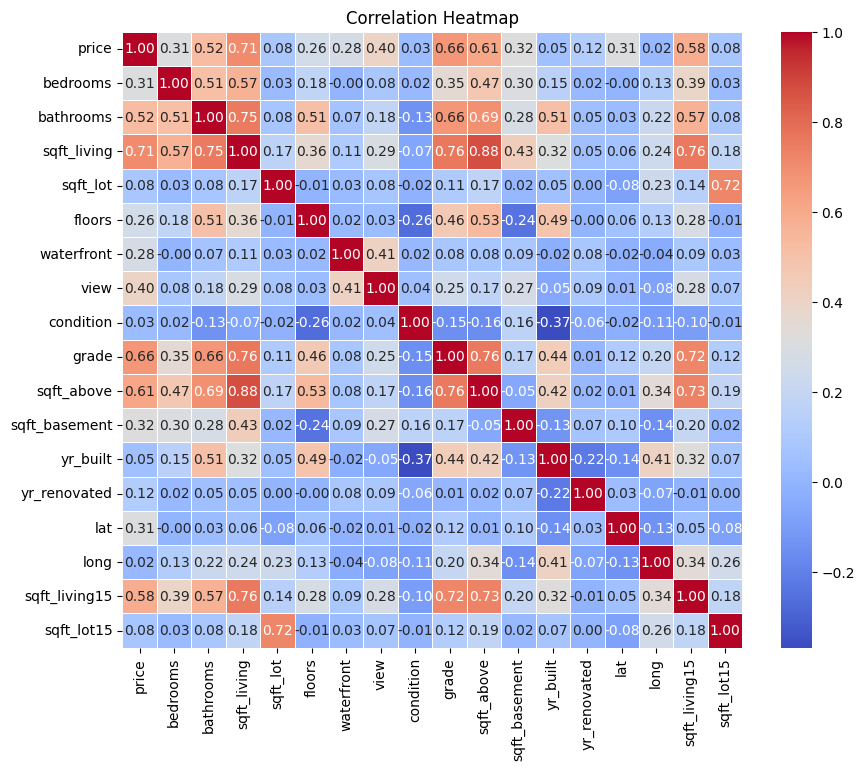

In [9]:
# Visualisation of the price drivers

import seaborn as sns
import matplotlib.pyplot as plt

#data = np.asarray(correlation_matrix).reshape()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()




<Figure size 1000x800 with 0 Axes>

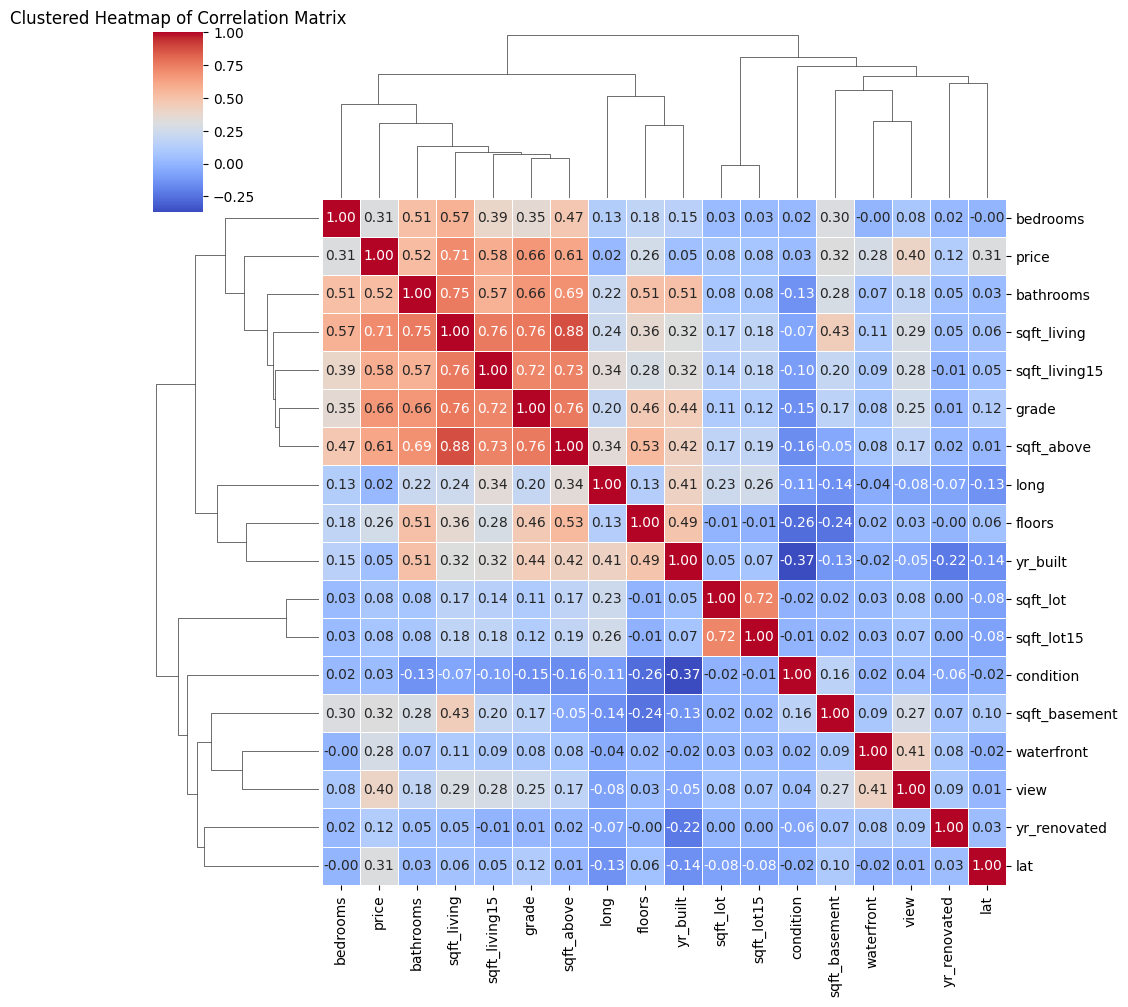

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot clustered heatmap
plt.figure(figsize=(10, 8))
sns.clustermap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Clustered Heatmap of Correlation Matrix')
plt.show()


### Result - Hypothesis 1

Price Drivers are:

* **sqft_living**
* **grade**
* **sqft_above**
* **sqft_living 15**

Suprising:

* The **View** and **Waterfront** are actually not that important when it comes to the price of an house

# Hypothesis 2

### Hypothesis: The most averages houses are in the outskirts
### Goal: To find the most average neighboorhood by zipcode

In [11]:
# Data Analysis
# Getting the most average house in the most average neighboorhood to hide from the FBI

hypothesis2 = housing.copy()
hypothesis2.price

#After talking to the client we focus on the following factors
#Bedrooms, Bathrooms, sqft_living




0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21592    360000.0
21593    400000.0
21594    402101.0
21595    400000.0
21596    325000.0
Name: price, Length: 21597, dtype: float64

In [12]:
#Hey we are average - Eliminate the outliers (1%)
cols_to_clean = ["bedrooms", "bathrooms", "sqft_living"]
average_housing = housing.copy()
for col in cols_to_clean:
    q = housing[col].quantile(0.99)
    average_housing = average_housing[(average_housing[col] < q)]


In [13]:
# We need to establish the average House

avg_bedrooms = average_housing['bedrooms'].mean().round(2)
avg_bathrooms = average_housing['bathrooms'].mean().round(2)
avg_living = average_housing['sqft_living'].mean().round(2)

print(avg_bedrooms,avg_bathrooms,avg_living)

3.31 2.07 2015.11


## The Average House
**3.1 Bedrooms**
**2.07 Bathrooms**
**2015.11 Sqft of Living Space**

In [14]:
# Find the zipcodes with the most average houses

# Berechne die 10% Abweichung von den Durchschnittswerten für Schlafzimmer, Badezimmer und Quadratfuß Wohnfläche
threshold_bedrooms = avg_bedrooms * 0.1
threshold_bathrooms = avg_bathrooms * 0.1
threshold_living = avg_living * 0.1

# Filtere den DataFrame nach Häusern mit weniger als 10% Abweichung von den Durchschnittswerten
filtered_houses = housing[(housing['bedrooms'] <= avg_bedrooms + threshold_bedrooms) &
                          (housing['bedrooms'] >= avg_bedrooms - threshold_bedrooms) &
                          (housing['bathrooms'] <= avg_bathrooms + threshold_bathrooms) &
                          (housing['bathrooms'] >= avg_bathrooms - threshold_bathrooms) &
                          (housing['sqft_living'] <= avg_living + threshold_living) &
                          (housing['sqft_living'] >= avg_living - threshold_living)]

# Zähle die Anzahl der Häuser für jeden Zipcode
zipcode_counts = filtered_houses['zipcode'].value_counts()


In [15]:
# Berechne die 10% Abweichung von den Durchschnittswerten für Schlafzimmer, Badezimmer und Quadratfuß Wohnfläche
threshold_bedrooms = avg_bedrooms * 0.1
threshold_bathrooms = avg_bathrooms * 0.1
threshold_living = avg_living * 0.1

# Filtere den DataFrame nach Häusern mit weniger als 10% Abweichung von den Durchschnittswerten
filtered_houses = housing[(housing['bedrooms'] <= avg_bedrooms + threshold_bedrooms) &
                          (housing['bedrooms'] >= avg_bedrooms - threshold_bedrooms) &
                          (housing['bathrooms'] <= avg_bathrooms + threshold_bathrooms) &
                          (housing['bathrooms'] >= avg_bathrooms - threshold_bathrooms) &
                          (housing['sqft_living'] <= avg_living + threshold_living) &
                          (housing['sqft_living'] >= avg_living - threshold_living)]

# Zähle die Anzahl der Häuser für jeden Zipcode und sortiere nach Größe absteigend
zipcode_counts = filtered_houses['zipcode'].value_counts().sort_values(ascending=False)

groupby_zipcode = housing.groupby('zipcode')


In [16]:
#Total and Relative amount of average houses
zipcodes_total = zipcode_counts.head(15)

# Gruppieren nach Zipcode und Berechnen der durchschnittlichen Anzahl der Häuser pro Zipcode
avg_houses_per_zipcode = filtered_houses.groupby('zipcode').size()

# Berechnen der relativen Anzahl der durchschnittlichen Häuser pro Zipcode
relative_counts = zipcode_counts / avg_houses_per_zipcode

# Wähle die Top 15 Zipcodes mit den größten relativen Anteilen aus
zipcodes_relativ = relative_counts.head(15)


In [17]:
# Konvertiere die Indexwerte der Series in Strings
zipcodes_total_str = zipcodes_total.index.astype(str)

# Erstelle das Balkendiagramm für zipcodes_total
fig1 = go.Figure(go.Bar(x=zipcodes_total_str, y=zipcodes_total.values,
                        marker_color='blue'))
fig1.update_layout(title='Top 15 Zipcodes with the Most Houses (Total)',
                   xaxis_title='Zipcode',
                   yaxis_title='Number of Houses')


# Zeige die Plots an
fig1.show()


In [18]:
# Überprüfe, ob der Wert in der Spalte 'zipcode' in zipcodes_total enthalten ist
df_geo = filtered_houses.copy()
mask = df_geo['zipcode'].isin(zipcodes_total.index)

# Filtere df_geo basierend auf der Maske
df_geo_filtered = df_geo[mask]

# Überprüfe, ob die Zeilen richtig gefiltert wurden
df_geo_filtered['zipcode'].unique()



array([98027, 98038, 98074, 98001, 98042, 98031, 98003, 98034, 98023,
       98058, 98033, 98052, 98115, 98155, 98103])

In [21]:
fig = px.scatter_mapbox(df_geo_filtered, lat="lat", lon="long",
                         hover_name="price",
                         mapbox_style="open-street-map")

fig.update_geos(fitbounds = "locations")

fig.show()

# Hypothesis 3 - Houses in the central city
Oder H2 in zwei teilen?